# Búsqueda Tabú

Se implementará la versión de BT utilizando una lista de movimientos tabú y tres estrategias de reinicialización.Sus principales características son:
* Estrategia de selección de vecino: Consistirá en examinar 40 vecinos para cogerel mejor de acuerdo a los criterios tabú.
* Selección  de  estrategias  de reinicialización:  La  probabilidad  de  escoger  lareinicialización construyendo una solución inicial aleatoria es 0,25, la de usar lamemoria a largo plazo al generar una nueva solución greedy es 0,5, y la deutilizar la reinicialización desde la mejor solución obtenidaes 0,25.
* Además de saltar a una solución concreta según las reinicializaciones comentadas, también  se  alterará  un  parámetro  del  algoritmo  de  búsqueda  para  provocar  un cambio de comportamiento del algoritmo más efectivo. Este consistirá en variar el tamaño de la lista tabú, incrementándola o reduciéndola en un 50% según una decisión aleatoria uniforme. 
 
El número máximo de iteraciones en total, incluyendo las reinicializaciones, será de 40 · n. Se realizarán 4 reinicializaciones, es decir, una cada 8 · n iteraciones.  

El tamaño inicial   de   cada   lista   tabú   será n=2,   estos   valores   cambiarán   después   de   las reinicializaciones según se ha comentado.Dado el carácter probabilístico del algoritmo, deberá ejecutarse 10 veces (con semillas distintas para el generador aleatorio, para cada caso del problema (dataset).

### Librerías
- matplotlib: necesaria para la representación de la solución.
- pandas: necesaria para la representación de resultados.
- random: necesaria para el control de números aleatorios.
- datetime: necesaria para la obtención de una semilla inicial que genere las demás semillas.
- multiprocessing: necesaria para la ejecución concurrente de las soluciones.
- itertools: necesaria para combinar las semillas con los dataset en la ejecución concurrente.
- ipynb: necesaria para cargar la función busqueda_aleatorio de otro fichero. Esto permite la ejecución concurrente en Jupyter.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from random import seed
from random import randint
from datetime import datetime
from multiprocessing import Pool, TimeoutError
import itertools
from ipynb.fs.full.algoritmo import busqueda_tabu

### Funciones auxiliares
- cargar_fichero(nombre_fichero): devuelve un array con las ciudades almacenadas en el fichero. [ [ ciudad, posición x , posición y ] [...] ... ]
- dibujar_flecha(A, B): dibuja una flecha entre el punto A y B apuntando a B. 
- representacion(camino, nombre, distancia): representa las ciudades y el camino calculado.
- representacion_datos(result,nombre): representa la solución obtenida de la ejecución concurrente de un dataset.

In [2]:
def cargar_fichero(nombre_fichero):
    
    fichero = open( "../Dataset/" + nombre_fichero + ".tsp", 'r')
    
    for i in range(3):
        fichero.readline()
        
    numero_de_ciudades = fichero.readline().strip().split()[1]
    
    for i in range(2):
        fichero.readline()
        
    ciudades = []
    for i in range(0, int(numero_de_ciudades)):
        ciudad,x,y = fichero.readline().strip().split()[:]
        ciudades.append([int(ciudad),float(x),float(y)])  
        
    fichero.close()
    
    return ciudades

In [3]:
def dibujar_flecha(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=1.3, length_includes_head=True)

In [4]:
def representacion(camino, nombre, distancia):
    
    plt.figure(figsize=(10,10))
    
    for i in range(len(camino)):
        if(i == 0):
            plt.plot(camino[i][1], camino[i][2] , "o", color="green")
        else:
            plt.plot(camino[i][1], camino[i][2] , "*", color="red")
        
        if(i<len(camino)-1):
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[i+1][1], camino[i+1][2]])
        else:
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[0][1], camino[0][2]])
    
    plt.title(nombre + " : " + str(distancia))

In [5]:
def representacion_datos(result,nombre):
    semilla_coste = pd.DataFrame(columns=["Semilla","Coste","Nº de evaluaciones"])
    for i in range(10):


        semilla_coste.loc[len(semilla_coste)] = [semillas[i],result[i][1], result[i][2]]
    display(semilla_coste)

    print("Media coste: ", semilla_coste[['Coste']].mean()[0])
    print("Desviación típica coste: ", semilla_coste[['Coste']].std()[0])
    print("Media nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].mean()[0])
    print("Desviación típica nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].std()[0])


    print()
    print("Representación de la mejor solución: ")
    indice = semilla_coste[['Coste']].idxmin()[0]


    representacion(result[indice][0], nombre, result[indice][1])

### Función para calcular el coste
Función aparte para calcular el coste de una solución, esta fue desarrollada únicamente para comprobar que las soluciones obtenidas son correctas.

In [6]:
def calcular_coste(camino):
    coste = 0
    for indice in range(len(camino)):
        if(indice < len(camino)-1):
            coste += distancia_euclidea(camino[indice],camino[indice+1])
        else:
            coste += distancia_euclidea(camino[indice],camino[0])
    return coste

In [7]:
def distancia_euclidea(ciudad_1,ciudad_2):
    
    x1,y1 = ciudad_1[1 :]
    x2,y2 = ciudad_2[1 :]
    
    xd = x1 - x2;
    yd = y1 - y2;
    
    return round(math.sqrt( xd*xd + yd*yd ))

### Lectura de ficheros

In [8]:
st70 = cargar_fichero("st70")
ch130 = cargar_fichero("ch130")
a280 = cargar_fichero("a280")
p654 = cargar_fichero("p654")
vm1084 = cargar_fichero("vm1084")
vm1748 = cargar_fichero("vm1748")

Como el enunciado especifica que empecemos con la primera ciudad, con este algoritmo, independientemente de cuantas veces lo ejecutemos nos devolverá la misma solución. Por lo que se ejecutara solo una vez.

### Generación de semillas

In [9]:
semillas = []
dt = datetime.now()
for i in range(10):
    semillas.append(randint(0,dt.microsecond))
print("Semillas generadas:")
print(semillas)

Semillas generadas:
[876621, 552272, 354552, 99212, 616190, 358322, 176016, 332597, 180989, 675037]


#### st70

,Semilla,Coste,Nº de evaluaciones
0,876621.0,1018.0,112001.0
1,552272.0,1053.0,112001.0
2,354552.0,1030.0,112001.0
3,99212.0,1087.0,112001.0
4,616190.0,938.0,112001.0
5,358322.0,988.0,112001.0
6,176016.0,1068.0,112001.0
7,332597.0,1030.0,112001.0
8,180989.0,1050.0,112001.0
9,675037.0,1017.0,112001.0


Media coste:  1027.9
Desviación típica coste:  42.320076664496824
Media nº de evaluaciones:  112001.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


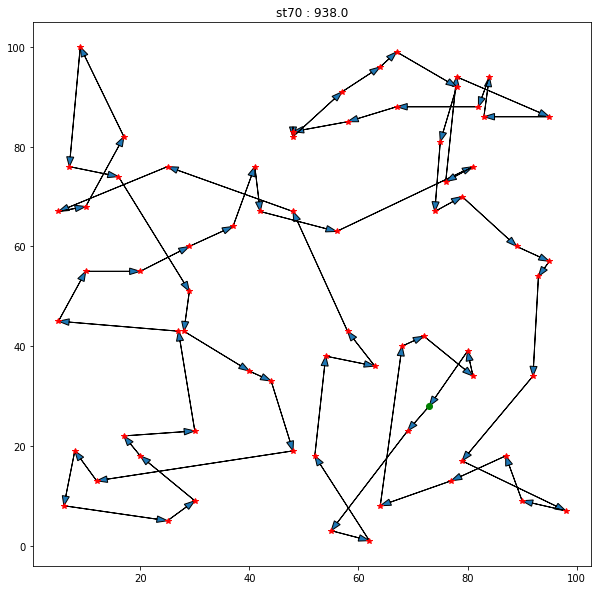

In [10]:
dataset = st70
with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_tabu,  itertools.product(semillas,[dataset],[40]) )
representacion_datos(result,"st70")

#### ch130


,Semilla,Coste,Nº de evaluaciones
0,876621.0,12573.0,208001.0
1,552272.0,11707.0,208001.0
2,354552.0,12373.0,208001.0
3,99212.0,11523.0,208001.0
4,616190.0,12134.0,208001.0
5,358322.0,12745.0,208001.0
6,176016.0,12418.0,208001.0
7,332597.0,12599.0,208001.0
8,180989.0,11898.0,208001.0
9,675037.0,12186.0,208001.0


Media coste:  12215.6
Desviación típica coste:  403.8025370015509
Media nº de evaluaciones:  208001.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


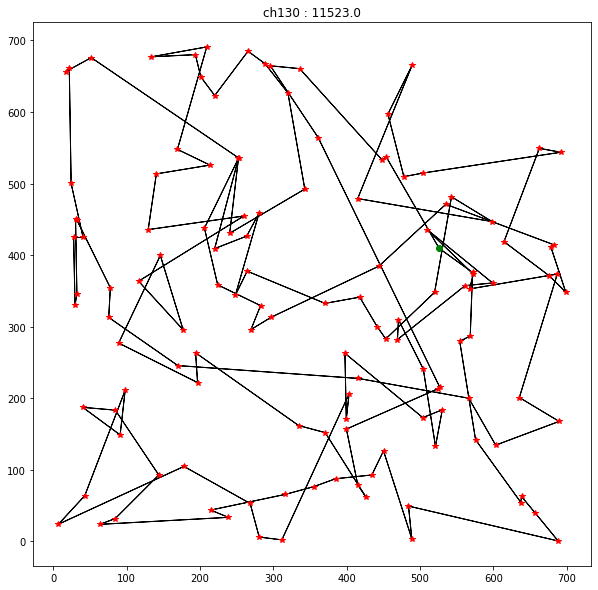

In [11]:
dataset = ch130

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_tabu,  itertools.product(semillas,[dataset],[40]) )
    
representacion_datos(result,"ch130")

#### a280

,Semilla,Coste,Nº de evaluaciones
0,876621.0,3011.0,448001.0
1,552272.0,3288.0,448001.0
2,354552.0,3276.0,448001.0
3,99212.0,3401.0,448001.0
4,616190.0,3344.0,448001.0
5,358322.0,3282.0,448001.0
6,176016.0,3162.0,448001.0
7,332597.0,3620.0,448001.0
8,180989.0,3219.0,448001.0
9,675037.0,3202.0,448001.0


Media coste:  3280.5
Desviación típica coste:  160.0376691768396
Media nº de evaluaciones:  448001.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


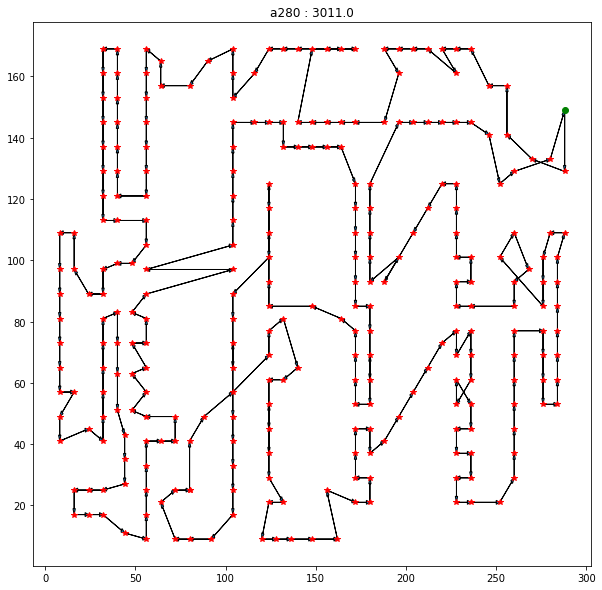

In [12]:
dataset = a280
with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_tabu,  itertools.product(semillas,[dataset],[40]) )

representacion_datos(result,"a280")

#### p654

,Semilla,Coste,Nº de evaluaciones
0,876621.0,110929.0,1046401.0
1,552272.0,111089.0,1046401.0
2,354552.0,109787.0,1046401.0
3,99212.0,293198.0,1046401.0
4,616190.0,116164.0,1046401.0
5,358322.0,125466.0,1046401.0
6,176016.0,109120.0,1046401.0
7,332597.0,108505.0,1046401.0
8,180989.0,113170.0,1046401.0
9,675037.0,117728.0,1046401.0


Media coste:  131515.6
Desviación típica coste:  57042.24892558926
Media nº de evaluaciones:  1046401.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


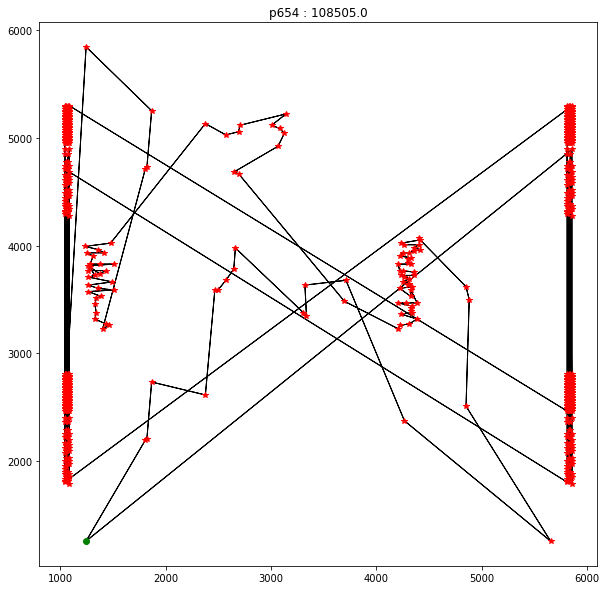

In [13]:
dataset = p654

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_tabu,  itertools.product(semillas,[dataset],[40]) )
    
representacion_datos(result,"p654")

#### vm1084

,Semilla,Coste,Nº de evaluaciones
0,876621.0,1746436.0,1734401.0
1,552272.0,1800370.0,1734401.0
2,354552.0,1898654.0,1734401.0
3,99212.0,1740613.0,1734401.0
4,616190.0,1890809.0,1734401.0
5,358322.0,1785738.0,1734401.0
6,176016.0,1787593.0,1734401.0
7,332597.0,1855986.0,1734401.0
8,180989.0,1801167.0,1734401.0
9,675037.0,1933765.0,1734401.0


Media coste:  1824113.1
Desviación típica coste:  66622.26241938784
Media nº de evaluaciones:  1734401.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


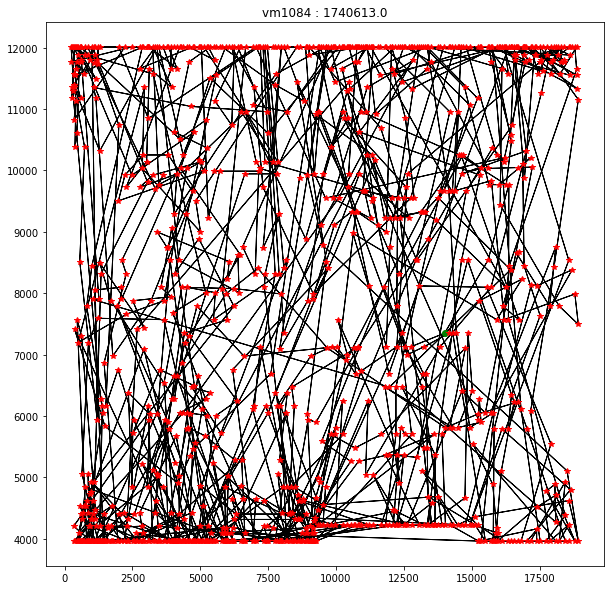

In [14]:
dataset = vm1084

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_tabu,  itertools.product(semillas,[dataset],[40]) )
    
representacion_datos(result,"vm1084")

#### vm1748

,Semilla,Coste,Nº de evaluaciones
0,876621.0,3248126.0,2796801.0
1,552272.0,3180037.0,2796801.0
2,354552.0,3262227.0,2796801.0
3,99212.0,3399787.0,2796801.0
4,616190.0,3259480.0,2796801.0
5,358322.0,3167089.0,2796801.0
6,176016.0,3349215.0,2796801.0
7,332597.0,3197357.0,2796801.0
8,180989.0,3261117.0,2796801.0
9,675037.0,3291358.0,2796801.0


Media coste:  3261579.3
Desviación típica coste:  72691.32158663172
Media nº de evaluaciones:  2796801.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


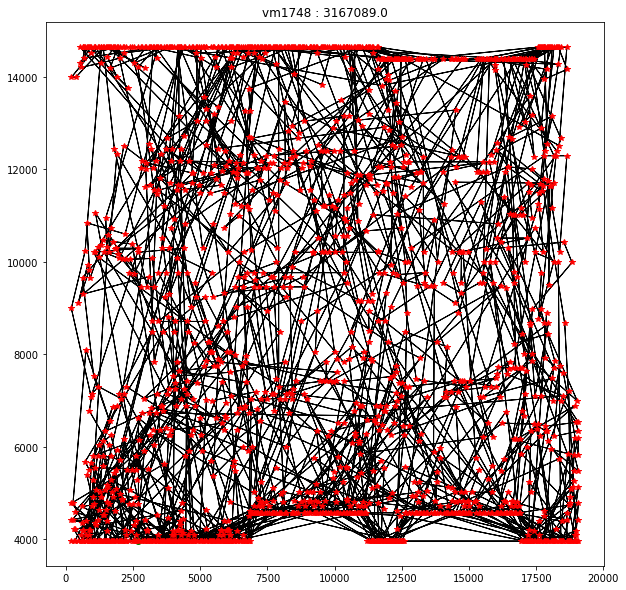

In [15]:
dataset = vm1748

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_tabu,  itertools.product(semillas,[dataset],[40]) )
    
representacion_datos(result,"vm1748")